In [43]:
import seaborn as sns
import numpy as np
# load dataset titanic
df = sns.load_dataset('titanic')
#know the shap of the dataset
print(df.shape)
df

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [44]:
#print some info about the dataset and its features
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [45]:
#print numbaring info about the dataset
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


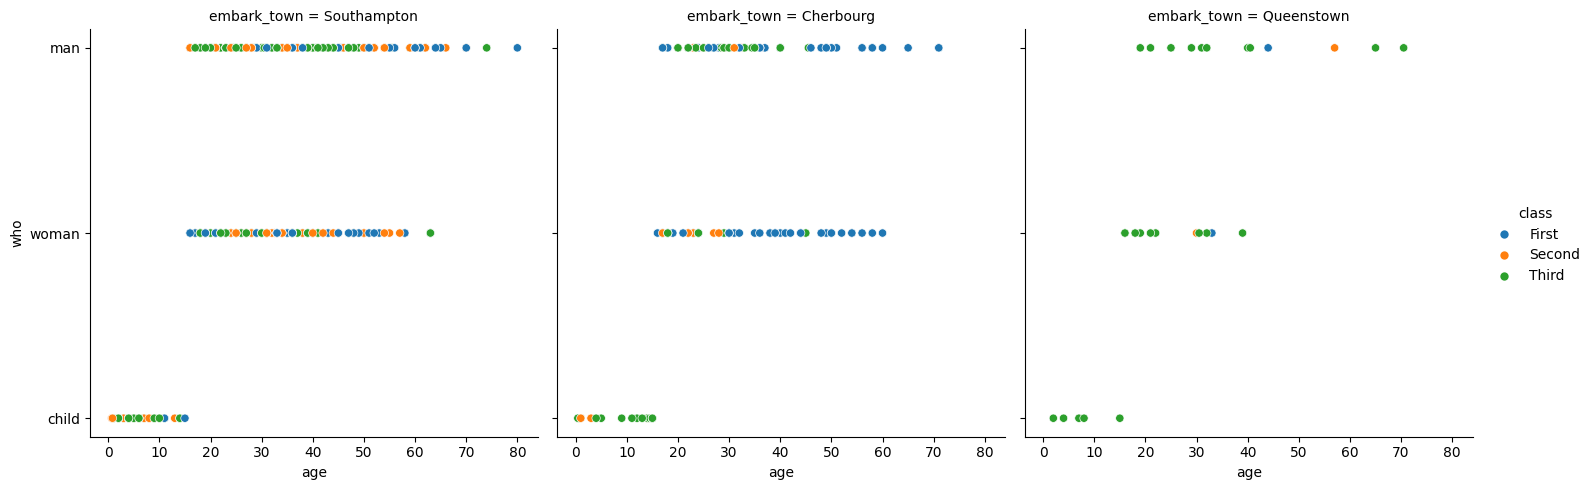

In [46]:
import seaborn as sns
sns.relplot(data=df,x='age',y='who',col='embark_town',hue='class')

<Axes: xlabel='who', ylabel='Count'>

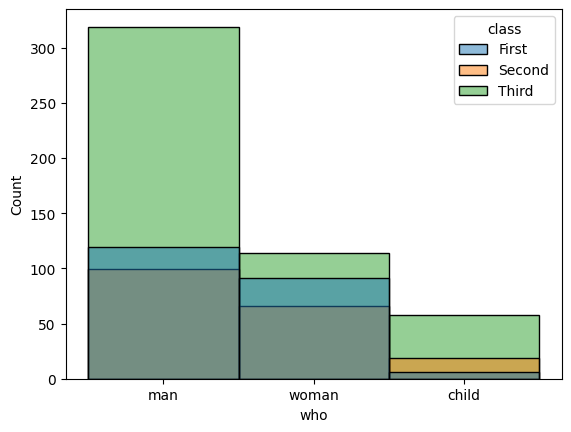

In [47]:
#represent the distribution of who feature based on class feature
sns.histplot(data=df,x='who',hue='class')

<Axes: xlabel='pclass', ylabel='fare'>

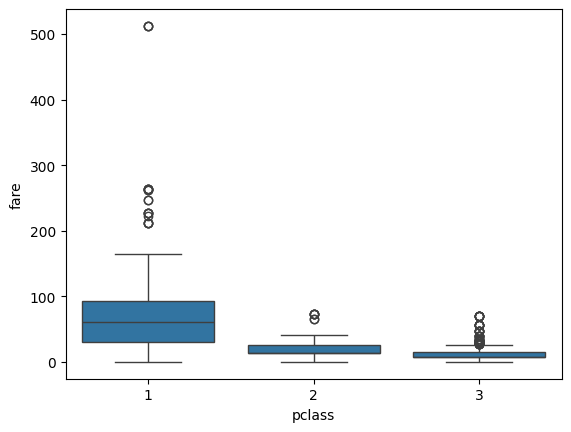

In [48]:
sns.boxplot(x='pclass',y='fare',data=df)

In [50]:
#compute Quartiles for the numeric features 
Q1_age = df["age"].quantile(0.25)
Q3_age = df["age"].quantile(0.75)
IQR_age = Q3_age - Q1_age
# Define lower and upper threshold for outliers
lower_threshold_age = Q1_age - 1.5 * IQR_age
upper_threshold_age = Q3_age + 1.5 * IQR_age
print("lower",lower_threshold_age)
print("upper",upper_threshold_age)
outliers_age = df[(df["age"] < lower_threshold_age) | (df["age"] > upper_threshold_age)]
print("Outliers for Age:")
print(outliers_age)
print("Interquartile range for age:\n", IQR_age)
print("_______________________________________________________________")

Q1_fare = df["fare"].quantile(0.25)
Q3_fare = df["fare"].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_threshold_fare = Q1_fare - 1.5 * IQR_fare
upper_threshold_fare = Q3_fare + 1.5 * IQR_fare
outliers_fare = df[(df["fare"] < lower_threshold_fare) | (df["fare"] > upper_threshold_fare)]
print("Outliers for Fare:")
print(outliers_fare)
print("Interquartile range for fare:\n", IQR_fare)

lower -6.6875
upper 64.8125
Outliers for Age:
     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
33          0       2  male  66.0      0      0  10.5000        S  Second   
54          0       1  male  65.0      0      1  61.9792        C   First   
96          0       1  male  71.0      0      0  34.6542        C   First   
116         0       3  male  70.5      0      0   7.7500        Q   Third   
280         0       3  male  65.0      0      0   7.7500        Q   Third   
456         0       1  male  65.0      0      0  26.5500        S   First   
493         0       1  male  71.0      0      0  49.5042        C   First   
630         1       1  male  80.0      0      0  30.0000        S   First   
672         0       2  male  70.0      0      0  10.5000        S  Second   
745         0       1  male  70.0      1      1  71.0000        S   First   
851         0       3  male  74.0      0      0   7.7750        S   Third   

     who  adult_male deck  em

In [52]:
#using median to handle the missing data for age 
Median_age=df['age'].median()
print(Median_age)
df["age"].fillna(Median_age, inplace=True)

#Using Mode to fill the missing data for the embarked
Mode_embarked=df['embarked'].mode()[0]
print(Mode_embarked)
df["embarked"].fillna(Mode_embarked, inplace=True)

#Using Mode to fill the missing data for the embarked_town
Mode_embark_town=df['embark_town'].mode()[0]
print(Mode_embark_town)
df["embark_town"].fillna(Mode_embark_town,inplace=True)
df["embark_town"].isnull()

#using remove column to handle the missing values issue for deck 
df.drop('deck', axis=1, inplace=True)



28.0
S
Southampton
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
None


In [55]:
#handling the outliers in age
df = df[(df['age'] >= lower_threshold_age) & (df['age'] <= upper_threshold_age)]

#handling the outliers in fare
df = df[(df['fare'] >= lower_threshold_fare) & (df['fare'] <= upper_threshold_fare)]


<class 'pandas.core.frame.DataFrame'>
Index: 765 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     765 non-null    int64   
 1   pclass       765 non-null    int64   
 2   sex          765 non-null    object  
 3   age          765 non-null    float64 
 4   sibsp        765 non-null    int64   
 5   parch        765 non-null    int64   
 6   fare         765 non-null    float64 
 7   embarked     765 non-null    object  
 8   class        765 non-null    category
 9   who          765 non-null    object  
 10  adult_male   765 non-null    bool    
 11  embark_town  765 non-null    object  
 12  alive        765 non-null    object  
 13  alone        765 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 74.1+ KB
None


In [61]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Handle missing values in categorical features
df.dropna(subset=categorical_features, inplace=True)

# Select categorical features for one-hot encoding
categorical_features = ['sex', 'embarked', 'who', 'embark_town']

# Subset the DataFrame with only categorical features
titanic_categorical = df[categorical_features]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical features
encoded_features = encoder.fit_transform(titanic_categorical)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded features with the original DataFrame
titanic_encoded = pd.concat([df.drop(columns=categorical_features), encoded_df], axis=1)

# Display the first few rows of the encoded dataset
print(titanic_encoded.head())

   survived  pclass   age  sibsp  parch     fare  class adult_male alive  \
0       0.0     3.0  22.0    1.0    0.0   7.2500  Third       True    no   
2       1.0     3.0  26.0    0.0    0.0   7.9250  Third      False   yes   
3       1.0     1.0  35.0    1.0    0.0  53.1000  First      False   yes   
4       0.0     3.0  35.0    0.0    0.0   8.0500  Third       True    no   
5       0.0     3.0  28.0    0.0    0.0   8.4583  Third       True    no   

   alone  sex_male  embarked_Q  embarked_S  who_man  who_woman  \
0  False       1.0         0.0         1.0      1.0        0.0   
2   True       0.0         0.0         1.0      0.0        1.0   
3  False       1.0         0.0         1.0      1.0        0.0   
4   True       1.0         1.0         0.0      1.0        0.0   
5   True       1.0         0.0         1.0      1.0        0.0   

   embark_town_Queenstown  embark_town_Southampton  
0                     0.0                      1.0  
2                     0.0               

C:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
#split the dataset into train and test set
from sklearn.model_selection import train_test_split

# Define X and y using all features from your original DataFrame df
X = df.drop(columns=['survived'])  # Drop the target column from X
y = df['survived']  # Use the target column as y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)

# Display the shapes of the resulting subsets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (127, 14)
X_test shape: (55, 14)
y_train shape: (127,)
y_test shape: (55,)


In [18]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['age', 'fare'] 
categorical_features = ['sex', 'embarked']  

scaler = StandardScaler()
X_train_scaled = X_train.copy() 
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

# Combine numerical and categorical features back together
X_train_scaled = pd.concat([X_train_scaled, X_train[categorical_features]], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test[categorical_features]], axis=1)


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numerical_features = ['age', 'fare']  
categorical_features = ['sex', 'embarked']  
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)

X_test_preprocessed = preprocessor.transform(X_test)

pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_preprocessed)
X_test_pca = pca.transform(X_test_preprocessed)
print("Number of components selected by PCA:", pca.n_components_)


Number of components selected by PCA: 4


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_pca, y_train)
y_pred = rf_classifier.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import precision_score, recall_score

precision_raw = precision_score(y_test, y_pred)
recall_raw = recall_score(y_test, y_pred)

print("Precision after preprocessing:", precision_raw)
print("Recall after preprocessing:", recall_raw)



Accuracy: 0.7478260869565218
Precision after preprocessing: 0.6081081081081081
Recall after preprocessing: 0.6081081081081081


In [21]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Drop rows with missing values for simplicity
df.dropna(inplace=True)

# Separate features and target
X = df.drop(columns=['survived'])
y = df['survived']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)

# Train and evaluate the Random Forest model on the raw data
rf_raw = RandomForestClassifier(random_state=42)
rf_raw.fit(X_train, y_train)
y_pred_raw = rf_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print("Accuracy on raw data:", accuracy_raw)

from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall before preprocessing
precision_raw = precision_score(y_test, y_pred_raw)
recall_raw = recall_score(y_test, y_pred_raw)

print("Precision before preprocessing:", precision_raw)
print("Recall before preprocessing:", recall_raw)



Accuracy on raw data: 1.0
Precision before preprocessing: 1.0
Recall before preprocessing: 1.0
